In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams.update({'font.size': 14})

In [2]:
L = 40
n = 512
x2 = np.linspace(-L / 2, L / 2, n + 1)
x = x2[:n]  # Spatial discretization

k = n * (2 * np.pi / L) * np.fft.fftfreq(n)
t = np.linspace(0, 2 * np.pi, 21)

In [3]:
def nls_rhs(ut_split, t, k=k):
    ut = ut_split[:n] + (1j) * ut_split[n:]
    u = np.fft.ifft(ut)
    rhs = -0.5 * (1j) * np.power(k, 2) * ut + (1j) * np.fft.fft(np.power(np.abs(u), 2) * u)
    rhs_split = np.concatenate((np.real(rhs), np.imag(rhs)))
    return rhs_split

In [4]:
N = 1
u = N / np.cosh(x)  # initial conditions
ut = np.fft.fft(u)  # FFT initial data
ut_split = np.concatenate((np.real(ut), np.imag(ut)))  # Separate real/complex pieces

utsol_split = integrate.odeint(nls_rhs, ut_split, t, mxstep=10 ** 6)
utsol = utsol_split[:, :n] + (1j) * utsol_split[:, n:]

usol = np.zeros_like(utsol)
for jj in range(len(t)):
    usol[jj, :] = np.fft.ifft(utsol[jj, :])  # transforming back


In [5]:
N = 2
u2 = N / np.cosh(x)  # initial conditions
ut2 = np.fft.fft(u2)  # FFT initial data
ut2_split = np.concatenate((np.real(ut2), np.imag(ut2)))  # Separate real/complex pieces

ut2sol_split = integrate.odeint(nls_rhs, ut2_split, t, mxstep=10 ** 6)
ut2sol = ut2sol_split[:, :n] + (1j) * ut2sol_split[:, n:]

u2sol = np.zeros_like(ut2sol)
for jj in range(len(t)):
    u2sol[jj, :] = np.fft.ifft(ut2sol[jj, :])  # transforming back


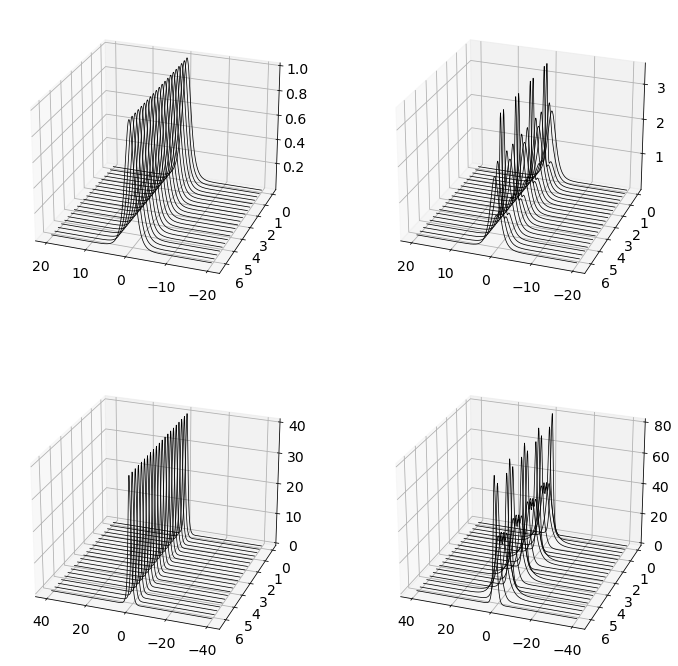

In [6]:
fig = plt.figure()
axs = [fig.add_subplot(2, 2, k, projection='3d') for k in range(1, 5)]

for ax in axs:
    ax.view_init(elev=25, azim=110)

for tt in range(len(t)):
    axs[0].plot(x, t[tt] * np.ones_like(x), np.abs(usol[tt, :]), color='k', linewidth=0.75)
    axs[2].plot(np.fft.fftshift(k), t[tt] * np.ones_like(x),
                np.abs(np.fft.fftshift(utsol[tt, :])), color='k', linewidth=0.75)

    axs[1].plot(x, t[tt] * np.ones_like(x), np.abs(u2sol[tt, :]), color='k', linewidth=0.75)
    axs[3].plot(np.fft.fftshift(k), t[tt] * np.ones_like(x),
                np.abs(np.fft.fftshift(ut2sol[tt, :])), color='k', linewidth=0.75)

plt.show()

In [7]:
U, S, VT = np.linalg.svd(usol.T)
U2, S2, VT2 = np.linalg.svd(u2sol.T)

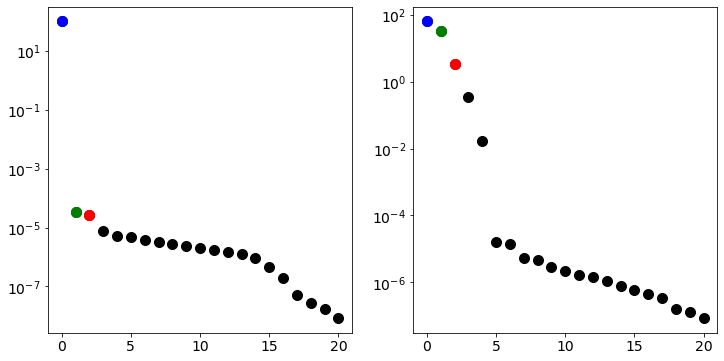

In [8]:
plt.rcParams['figure.figsize'] = [12, 6]

fig, axs = plt.subplots(1, 2)
axs[0].semilogy(100 * S / np.sum(S), 'ko', ms=10)
axs[0].semilogy(0, 100 * S[0] / np.sum(S), 'bo', ms=10)
axs[0].semilogy(1, 100 * S[1] / np.sum(S), 'go', ms=10)
axs[0].semilogy(2, 100 * S[2] / np.sum(S), 'ro', ms=10)
axs[0].set_xlim(-1, 21)

axs[1].semilogy(100 * S2 / np.sum(S2), 'ko', ms=10)
axs[1].semilogy(0, 100 * S2[0] / np.sum(S2), 'bo', ms=10)
axs[1].semilogy(1, 100 * S2[1] / np.sum(S2), 'go', ms=10)
axs[1].semilogy(2, 100 * S2[2] / np.sum(S2), 'ro', ms=10)
axs[1].set_xlim(-1, 21)

plt.show()

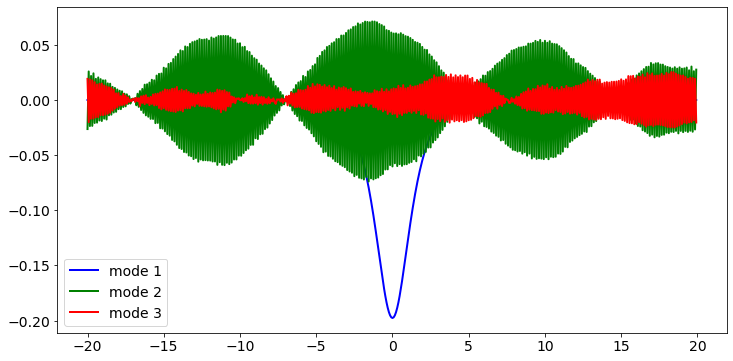

In [9]:
color_list = ['b', 'g', 'r']
for jj in range(3):
    plt.plot(x, np.real(U[:, jj]), color=color_list[jj], linewidth=2,
             label='mode {}'.format(jj + 1))
plt.legend()
plt.show()

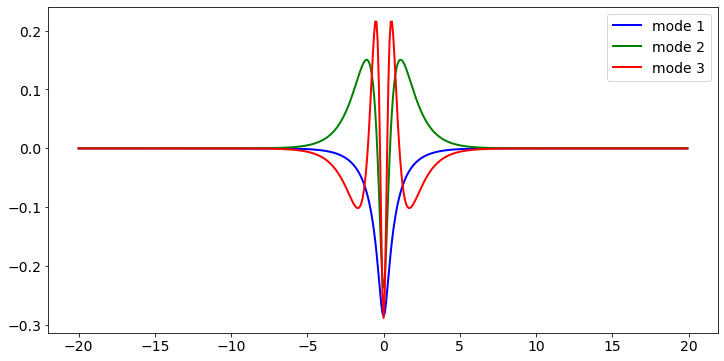

In [10]:
for jj in range(3):
    plt.plot(x, np.real(U2[:, jj]), color=color_list[jj], linewidth=2,
             label='mode {}'.format(jj + 1))
plt.legend()
plt.show()